In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("placement.csv")

In [4]:
df.shape

(1000, 3)

In [3]:
df.head()


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


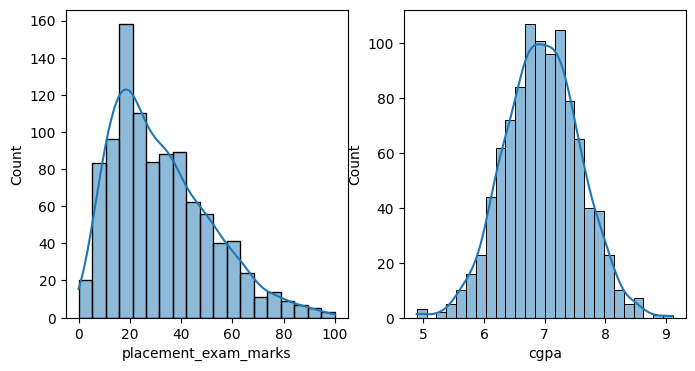

In [5]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['cgpa'], kde=True)

plt.show()

In [8]:
print(df["cgpa"].mean())
print(df["cgpa"].std())
print(df["cgpa"].min())
print(df["cgpa"].max())




6.96124
0.6158978751323896
4.89
9.12


In [10]:
lower_limit=df['cgpa'].mean() - 3*df['cgpa'].std()
upper_limit=df['cgpa'].mean() + 3*df['cgpa'].std()
print(lower_limit)
print(upper_limit)

5.113546374602832
8.808933625397168


In [13]:
df[(df['cgpa']<lower_limit) | (df['cgpa']>upper_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [17]:
## trimming 
new_df=df[(df['cgpa']>lower_limit) & (df['cgpa']<upper_limit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [18]:
## approach 2 
# calculating the z_score
df['cgpa_z_score']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()


In [19]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [22]:
df[(df['cgpa_z_score']>3) | (df['cgpa_z_score']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


## Capping 

In [23]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit, 
    upper_limit , 
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa'] 
        )
     )

In [25]:
df[(df['cgpa']>3) | (df['cgpa']<-3)]
df

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


## **Outlier detection and removal using IQR**

In [26]:
df=pd.read_csv("placement.csv")


In [27]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [28]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [29]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

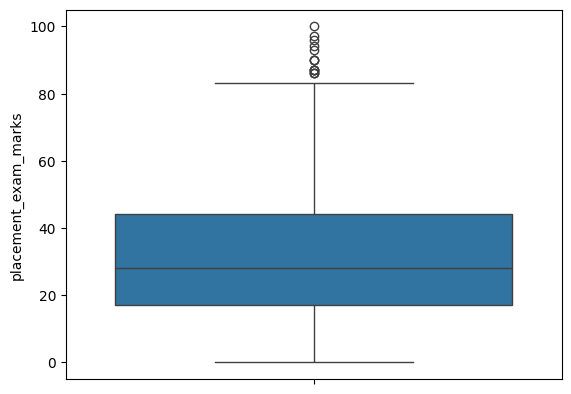

In [30]:
sns.boxplot(df['placement_exam_marks'])

In [31]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)


In [33]:
percentile75

np.float64(44.0)

In [34]:
IQR=percentile75-percentile25

In [35]:
upper_limit=percentile75 + 1.5*IQR
lower_limit=percentile25 - 1.5*IQR


## Trimming

In [36]:

new_df= df[df['placement_exam_marks']<upper_limit]

In [37]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


15 outliers are removed

<Axes: ylabel='placement_exam_marks'>

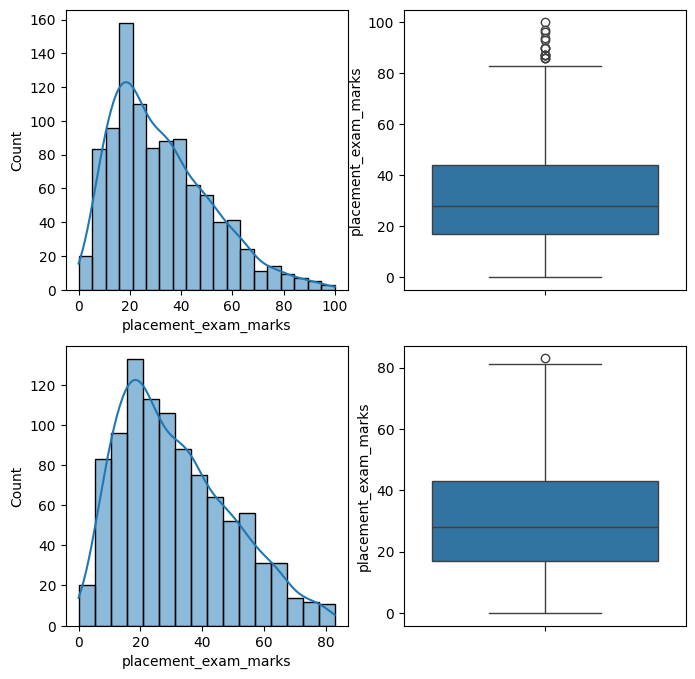

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'], kde=True)
plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

# **Capping**

In [39]:
new_df_cap= df.copy()

new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limit, 
    upper_limit , 
    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks'] 
        )
     )

In [40]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: ylabel='placement_exam_marks'>

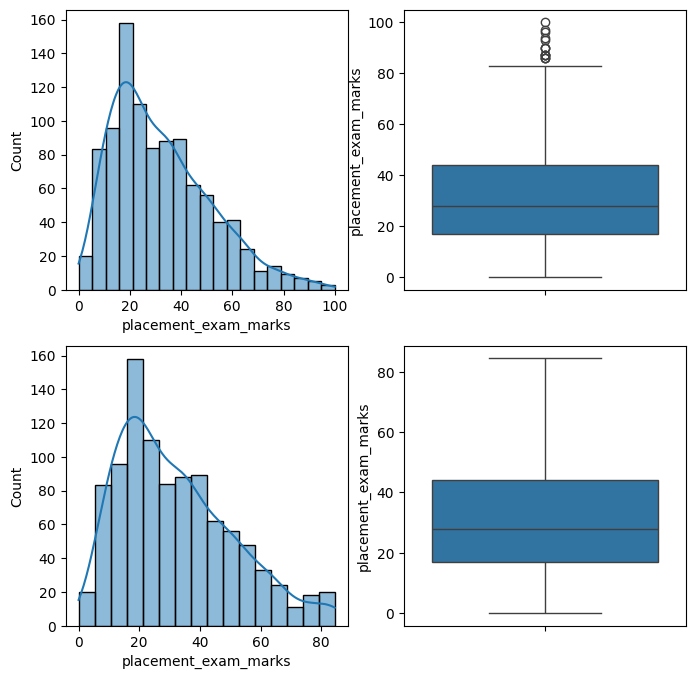

In [42]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'], kde=True)
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])